In [4]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook

import fastbook
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 3.9 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 31.7 MB/s 
     |████████████████████████████████| 1.2 MB 40.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 558 kB 45.4 MB/s 
     |████████████████████████████████| 51 kB 337 kB/s 
     |████████████████████████████████| 130 kB 36.0 MB/s 


In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_113.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_1.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_68.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_39.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_107.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_26.jpg')...]

In [8]:
frame = (path/'images').ls()[0]
frame

Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_69.jpg')

In [9]:
re.findall(r'(.+)_\d+.jpg$', frame.name)

['english_setter']

In [10]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/'images')
dls

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


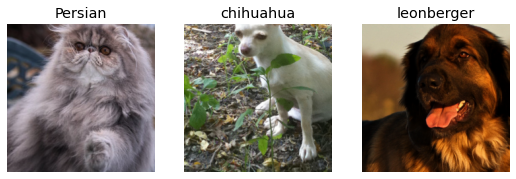

In [11]:
dls.show_batch(nrows=1, ncols=3)

In [12]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_102.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/beagle_102.jpg
    applying partial gives
      beagle
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(15)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(15))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.522140,0.291235,0.099459,02:05


epoch,train_loss,valid_loss,error_rate,time
0,0.515084,0.280074,0.089310,02:41
1,0.319904,0.189214,0.066982,02:41


In [14]:
x, y = dls.one_batch()
y

TensorCategory([33, 27, 27, 24, 35,  3, 23, 31, 29, 24,  1, 28,  9, 29,  7, 23,  4,  0, 34, 29, 31,  9, 28, 34,  6, 35, 16, 32,  5, 19, 18, 20, 12,  9,  1, 14, 10,  8,  9, 28, 23, 24,  0, 16, 20, 33, 17,  3,
        20,  6, 14, 29, 14, 28, 14, 23, 22, 28, 22,  2, 12,  5,  1, 13], device='cuda:0')

In [15]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([3.5115e-03, 6.7688e-06, 2.6557e-05, 3.5132e-05, 6.7249e-05, 1.1745e-05, 4.0747e-06, 5.7460e-06, 2.5026e-05, 2.3335e-03, 6.9648e-04, 1.0739e-05, 2.1169e-05, 1.1365e-05, 7.0041e-06, 9.3830e-05,
        3.1847e-03, 2.8319e-04, 4.5210e-06, 5.3504e-07, 8.6781e-06, 1.4557e-04, 2.9741e-06, 3.3657e-06, 2.9837e-04, 9.7674e-04, 6.6531e-05, 6.1608e-06, 3.0771e-05, 4.0323e-03, 9.3502e-06, 5.1032e-05,
        1.8677e-06, 9.8370e-01, 2.9992e-04, 2.5918e-05, 3.6514e-06])

In [16]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  


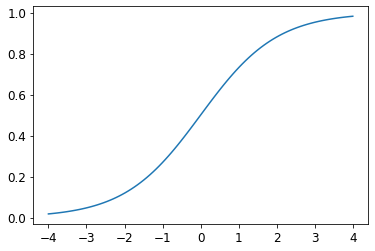

In [17]:
plot_function(torch.sigmoid, min=-4, max=4)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

!git config --global user.email 'intaek428@gmail.com'
!git config --global user.name 'ITHwang'

!git add .
!git commit -m '4.4.1까지'
!git push